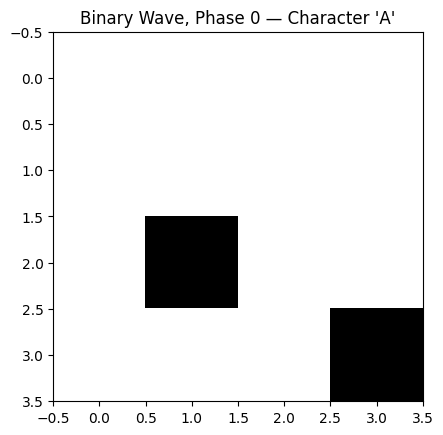

Time 0, fade 1.0 -> [0. 0. 0. 0.]
Time 1, fade 0.9 -> [0. 0. 0. 0.]
Time 2, fade 0.8 -> [0. 0. 0. 0.]
Time 3, fade 0.7 -> [0. 0. 0. 0.]
Time 4, fade 0.6 -> [0. 0. 0. 0.]
Time 5, fade 0.5 -> [0. 0. 0. 0.]
Time 6, fade 0.4 -> [0. 0. 0. 0.]
Time 7, fade 0.3 -> [0. 0. 0. 0.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Encode a character in binary ---
char = 'A'
code_point = ord(char)           # e.g., 65 for 'A'
bin_repr   = f"{code_point:016b}"  # 16-bit binary string

# --- Step 2: Create a 2D bit 'image' (rows x columns) ---
# Here, we can imagine a simple 4x4 grid for 16 bits.
bit_matrix = np.array([int(b) for b in bin_repr]).reshape(4, 4)

# --- Step 3: Fake a 3rd dimension (time or phase) ---
# We'll replicate this matrix with slight "phase shifts" as a toy waveform.
time_slices = []
num_phases = 8
for t in range(num_phases):
    # For each time step, let's shift bits left by t positions (mod 4),
    # creating a simplistic "rolling" effect.
    shifted = np.roll(bit_matrix, shift=t, axis=1)
    time_slices.append(shifted)

wave_3d = np.stack(time_slices)  # shape: (time, rows, cols)

# --- Step 4: Visualize a slice to get a feel ---
plt.imshow(wave_3d[0], cmap='binary')
plt.title(f"Binary Wave, Phase 0 — Character '{char}'")
plt.show()

# --- Step 5: Imagine a 4th dimension ---
# Perhaps we replicate wave_3d with different intensities or "fading".
# Here, let's keep it simple and fade the bits by a factor per time step:
wave_4d = []
for t in range(num_phases):
    # Multiply bits by a fade factor (e.g., 1 - t*0.1)
    fade_factor = max(0, 1.0 - t*0.1)
    wave_4d.append(wave_3d[t].astype(float) * fade_factor)

wave_4d = np.stack(wave_4d)  # shape: (time, rows, cols)

# Just a quick peek at how fade changes the first row in each slice:
for t in range(num_phases):
    print(f"Time {t}, fade {1 - t*0.1:.1f} -> {wave_4d[t][0]}")


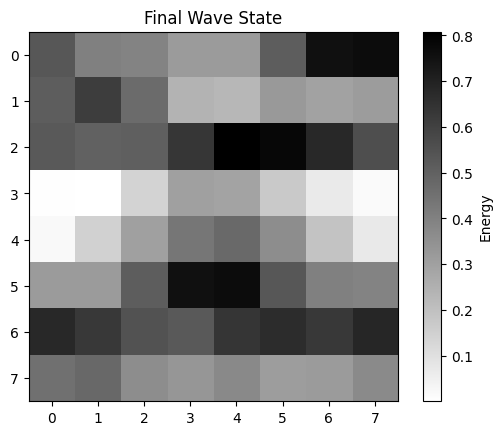

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rows, cols = 8, 8     # 2D grid size
timesteps  = 12       # Number of iterations
fade_rate  = 0.85     # Energy fade factor per step
forward_rate = 0.15   # How much energy flows forward each step
discrete    = False   # If True, clamp after each update (bit-like)

# Initialize random binary wave (0 or 1)
wave = np.random.randint(0, 2, size=(rows, cols)).astype(float)

# To store snapshots at each timestep
history = [wave.copy()]

for t in range(timesteps):
    next_wave = wave * fade_rate  # fade
    # forward shift energy in columns (wrap around)
    shifted = np.roll(wave, shift=1, axis=1)  
    next_wave += shifted * forward_rate
    
    if discrete:
        # Clamp values back to 0 or 1 to keep it truly bit-like
        next_wave = (next_wave >= 0.5).astype(float)
    
    wave = next_wave
    history.append(wave.copy())

# Visualize the final state
plt.imshow(history[-1], cmap='binary', origin='upper')
plt.title("Final Wave State")
plt.colorbar(label='Energy')
plt.show()

# --- Example of printing or plotting history frames ---
# for idx, state in enumerate(history):
#     plt.figure()
#     plt.imshow(state, cmap='binary', origin='upper')
#     plt.title(f"Wave State at t={idx}")
#     plt.colorbar(label='Energy')
#     plt.show()


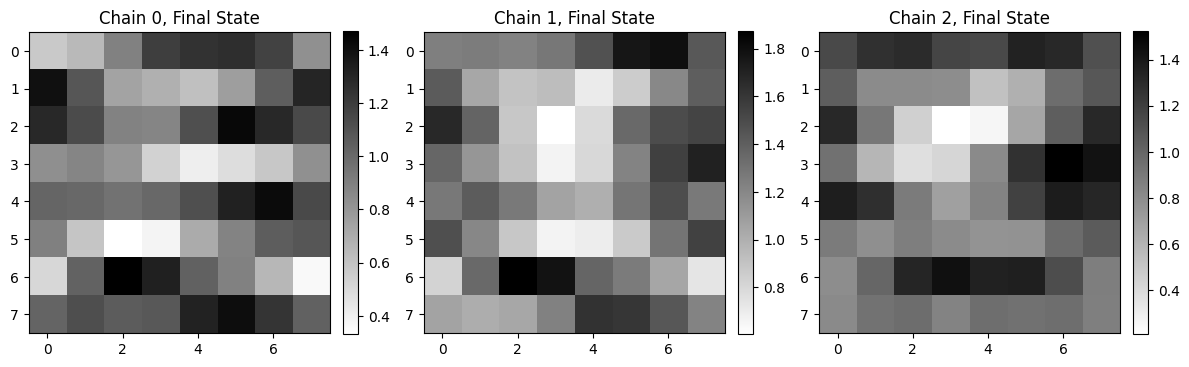

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
num_chains   = 3    # How many 2D grids/layers
rows, cols   = 8, 8
timesteps    = 10
fade_rate    = 0.85
forward_rate = 0.15
cross_rate   = 0.05  # How much energy flows between chains
discrete     = False

# --- Initialize random states for each chain ---
# shape: (num_chains, rows, cols)
waves = np.random.randint(0, 2, size=(num_chains, rows, cols)).astype(float)

history = [waves.copy()]

for _ in range(timesteps):
    new_waves = waves.copy()
    
    for chain_idx in range(num_chains):
        wave = waves[chain_idx]
        
        # 1) Fade
        next_wave = wave * fade_rate
        
        # 2) Forward shift in columns
        shifted = np.roll(wave, shift=1, axis=1)  
        next_wave += shifted * forward_rate
        
        # 3) (Optional) Cross-layer exchange
        #    We'll average in some energy from the chain above & below
        if chain_idx > 0:
            next_wave += waves[chain_idx - 1] * cross_rate
        if chain_idx < num_chains - 1:
            next_wave += waves[chain_idx + 1] * cross_rate
        
        # 4) Discrete clamp (if desired)
        if discrete:
            next_wave = (next_wave >= 0.5).astype(float)
        
        new_waves[chain_idx] = next_wave
    
    waves = new_waves
    history.append(waves.copy())

# --- Visualization of final state in each chain ---
fig, axes = plt.subplots(1, num_chains, figsize=(4*num_chains, 4))
for i, ax in enumerate(axes):
    im = ax.imshow(waves[i], cmap='binary', origin='upper')
    ax.set_title(f"Chain {i}, Final State")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


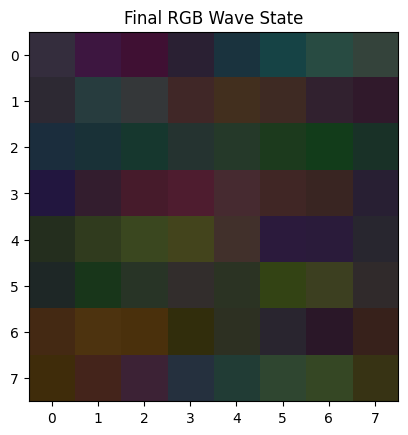

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensions: 3D -> (rows, cols, color_channels)
rows, cols      = 8, 8
color_channels  = 3  # R, G, B
timesteps       = 10
fade_rate       = 0.8
forward_rate    = 0.1
discrete        = False

# Initialize random state: each cell is [R,G,B] in [0,1]
state = np.random.rand(rows, cols, color_channels)

history = [state.copy()]

for _ in range(timesteps):
    # Fade
    next_state = state * fade_rate
    
    # Forward shift by rolling columns; apply some fraction
    shifted = np.roll(state, shift=1, axis=1)
    next_state += shifted * forward_rate
    
    # (Optional) clamp each color channel to discrete 0/1
    if discrete:
        next_state = (next_state >= 0.5).astype(float)
    
    state = next_state
    history.append(state.copy())

# Visualize final state in a single 2D plot by combining R,G,B
# (We only show the final frame here.)
final_image = np.clip(state, 0, 1)  # ensure values in [0,1]
plt.imshow(final_image, origin='upper')
plt.title("Final RGB Wave State")
plt.show()


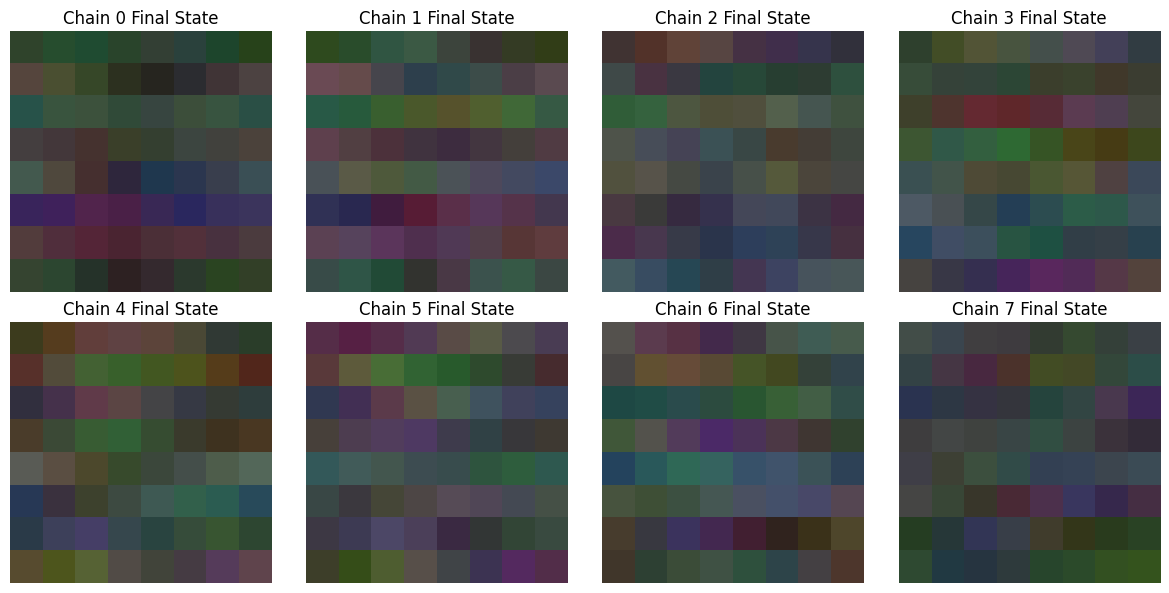

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
num_chains      = 8            # How many 2D color layers
rows, cols      = 8, 8         # Size of each 2D grid
color_channels  = 3            # R, G, B
timesteps       = 10
fade_rate       = 0.8
forward_rate    = 0.1
cross_rate      = 0.02         # Energy bleed between layers
discrete        = False        # If True, clamp R/G/B to 0 or 1

# Shape: (num_chains, rows, cols, color_channels)
layers = np.random.rand(num_chains, rows, cols, color_channels)

history = [layers.copy()]

for _ in range(timesteps):
    new_layers = layers.copy()
    
    for i in range(num_chains):
        layer = layers[i]
        
        # 1) Fade
        next_layer = layer * fade_rate
        
        # 2) Forward shift along columns (simulating "flow")
        shifted = np.roll(layer, shift=1, axis=1)
        next_layer += shifted * forward_rate
        
        # 3) Cross-layer exchange (layer above/below)
        if i > 0:
            next_layer += layers[i - 1] * cross_rate
        if i < num_chains - 1:
            next_layer += layers[i + 1] * cross_rate
        
        # 4) Optional discrete clamp on RGB
        if discrete:
            next_layer = (next_layer >= 0.5).astype(float)
        
        new_layers[i] = np.clip(next_layer, 0.0, 1.0)
    
    layers = new_layers
    history.append(layers.copy())

# --- Visualization ---
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 8 subplots (2 rows x 4 cols)
axes = axes.ravel()

for i in range(num_chains):
    axes[i].imshow(layers[i], origin='upper')
    axes[i].set_title(f"Chain {i} Final State")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


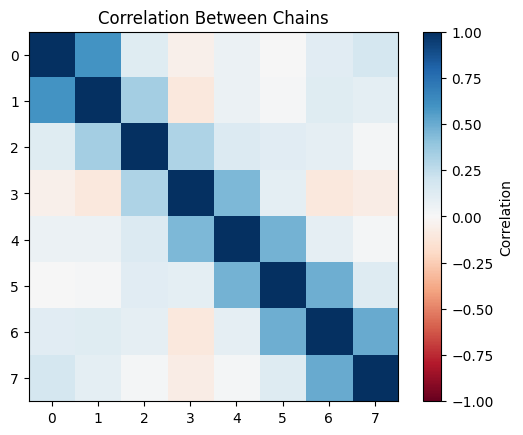

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose we have the final state 'layers' array from the previous example,
# shaped (num_chains, rows, cols, 3).
# We'll flatten each chain’s RGB grid into a 1D vector and compute correlation.

num_chains = layers.shape[0]
vectors = []

for i in range(num_chains):
    # Flatten the (rows, cols, 3) into a single vector
    vec = layers[i].reshape(-1)
    vectors.append(vec)

vectors = np.array(vectors)  # shape: (num_chains, rows*cols*3)

# Compute correlation matrix across chains
corr_matrix = np.corrcoef(vectors)

# Plot it
plt.imshow(corr_matrix, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title("Correlation Between Chains")
plt.xticks(range(num_chains))
plt.yticks(range(num_chains))
plt.show()


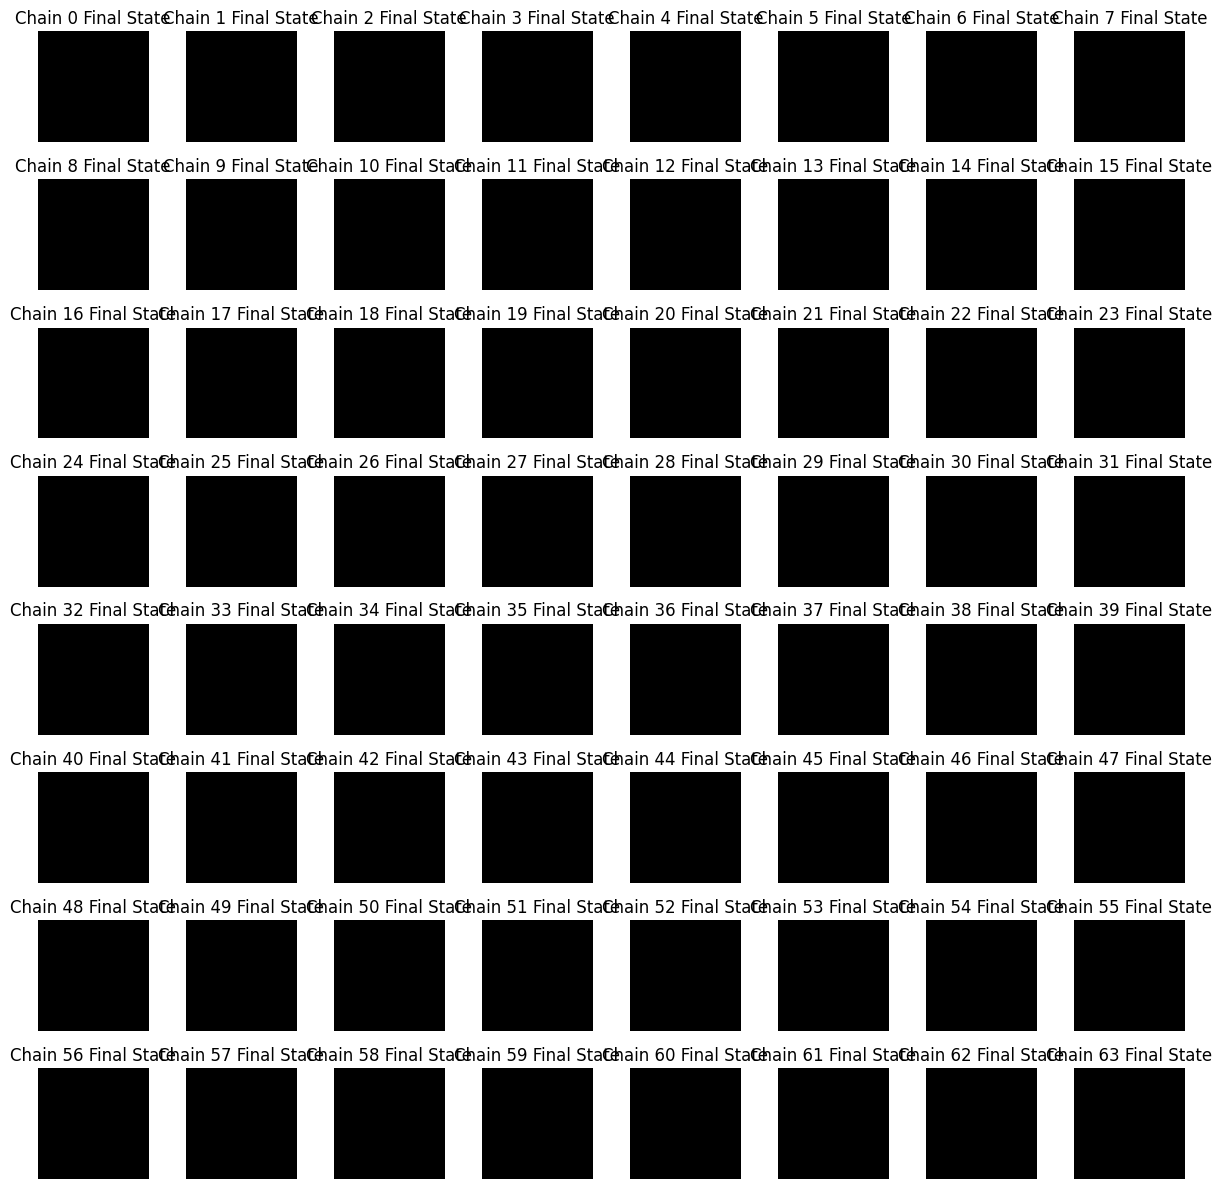

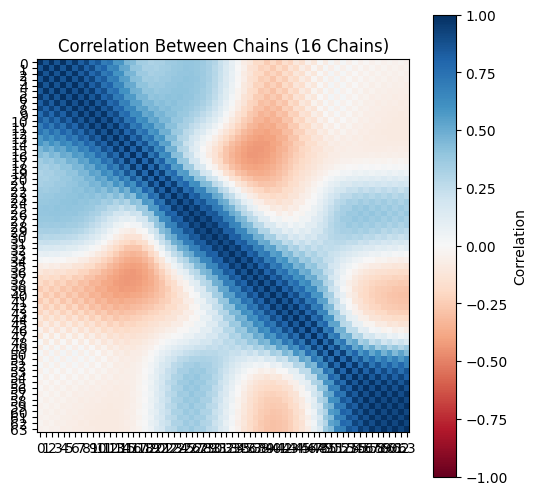

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
num_chains      = 64           # 16 "neurons" / layers
rows, cols      = 8, 8
color_channels  = 3             # R, G, B
timesteps       = 100
fade_rate       = 0.001
forward_rate    = 0.1
cross_rate      = 0.02
discrete        = False         # If True, clamp each channel to 0 or 1

# Shape: (num_chains, rows, cols, color_channels)
layers = np.random.rand(num_chains, rows, cols, color_channels)

history = [layers.copy()]

for _ in range(timesteps):
    new_layers = layers.copy()
    
    for i in range(num_chains):
        layer = layers[i]
        
        # 1) Fade
        next_layer = layer * fade_rate
        
        # 2) Forward shift in columns
        shifted = np.roll(layer, shift=1, axis=1)
        next_layer += shifted * forward_rate
        
        # 3) Cross-layer exchange
        if i > 0:
            next_layer += layers[i - 1] * cross_rate
        if i < num_chains - 1:
            next_layer += layers[i + 1] * cross_rate
        
        if discrete:
            # Clamp values back to 0 or 1
            next_layer = (next_layer >= 0.5).astype(float)
        
        new_layers[i] = np.clip(next_layer, 0.0, 1.0)
    
    layers = new_layers
    history.append(layers.copy())

# --- Visualization: Final state of each chain ---
nrows = 8  # for subplot layout
ncols = 8  # 16 = 4x4
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.ravel()

for i in range(num_chains):
    axes[i].imshow(layers[i], origin='upper')
    axes[i].set_title(f"Chain {i} Final State")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# --- Optionally check correlation among chains ---
flattened = []
for i in range(num_chains):
    vec = layers[i].reshape(-1)  # flatten (rows*cols*3)
    flattened.append(vec)
flattened = np.array(flattened)

corr_matrix = np.corrcoef(flattened)

plt.figure(figsize=(6,6))
plt.imshow(corr_matrix, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title("Correlation Between Chains (16 Chains)")
plt.xticks(range(num_chains))
plt.yticks(range(num_chains))
plt.show()


Processing sequence: ['Hello', 'World', 'Hello', 'Python']

Watching our little neuron learn...

Step 1: Processing 'Hello'


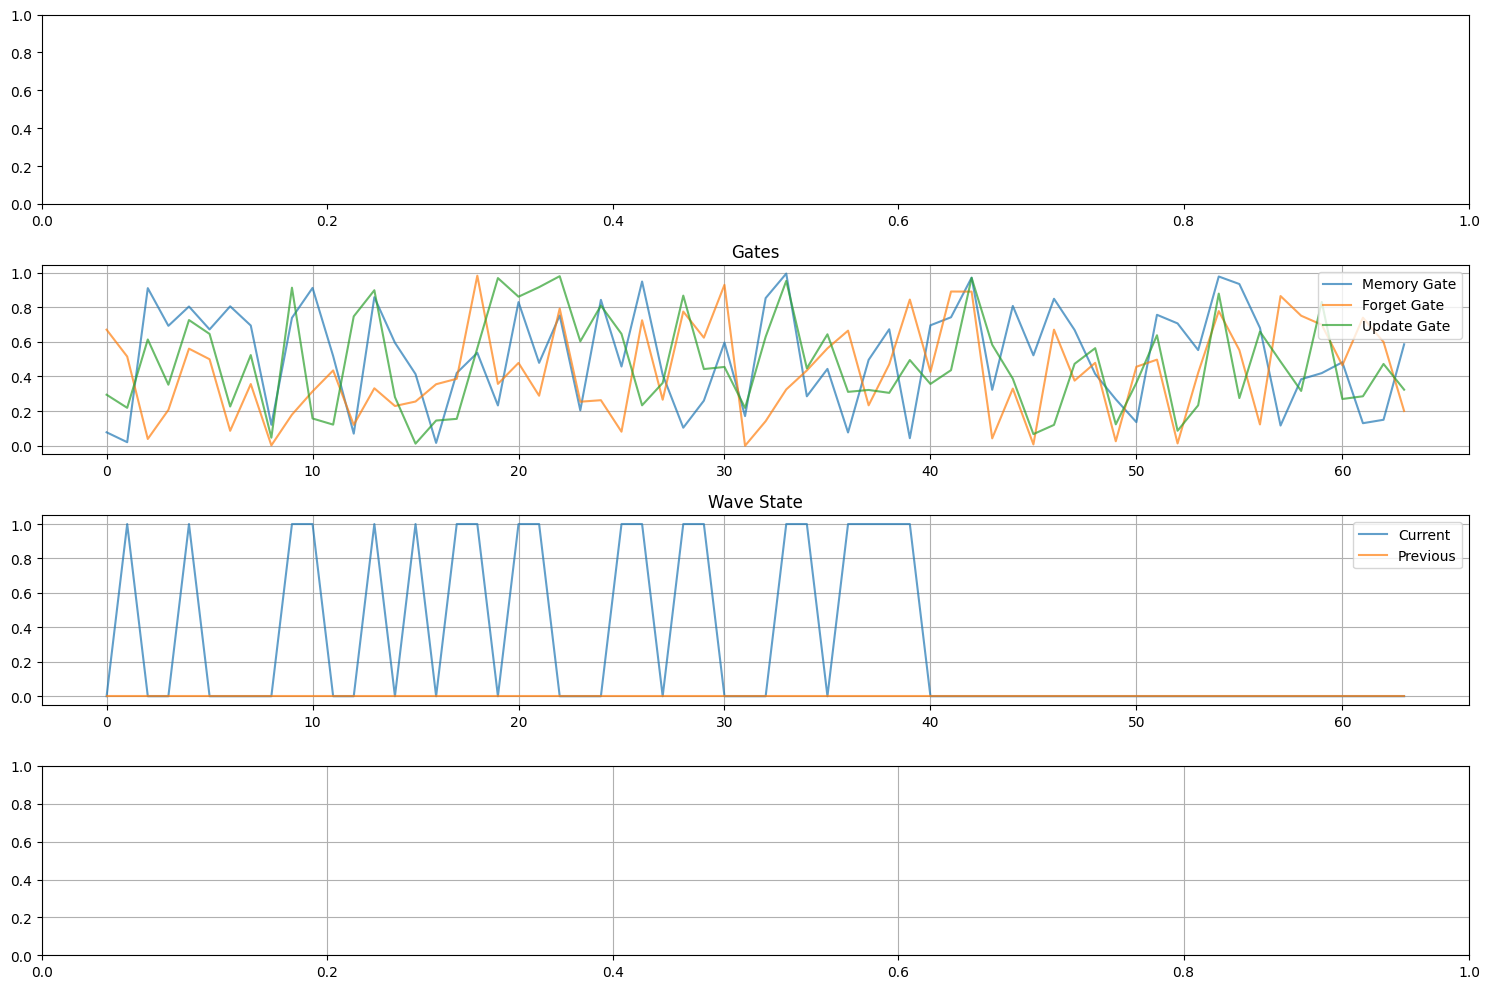


Step 2: Processing 'World'


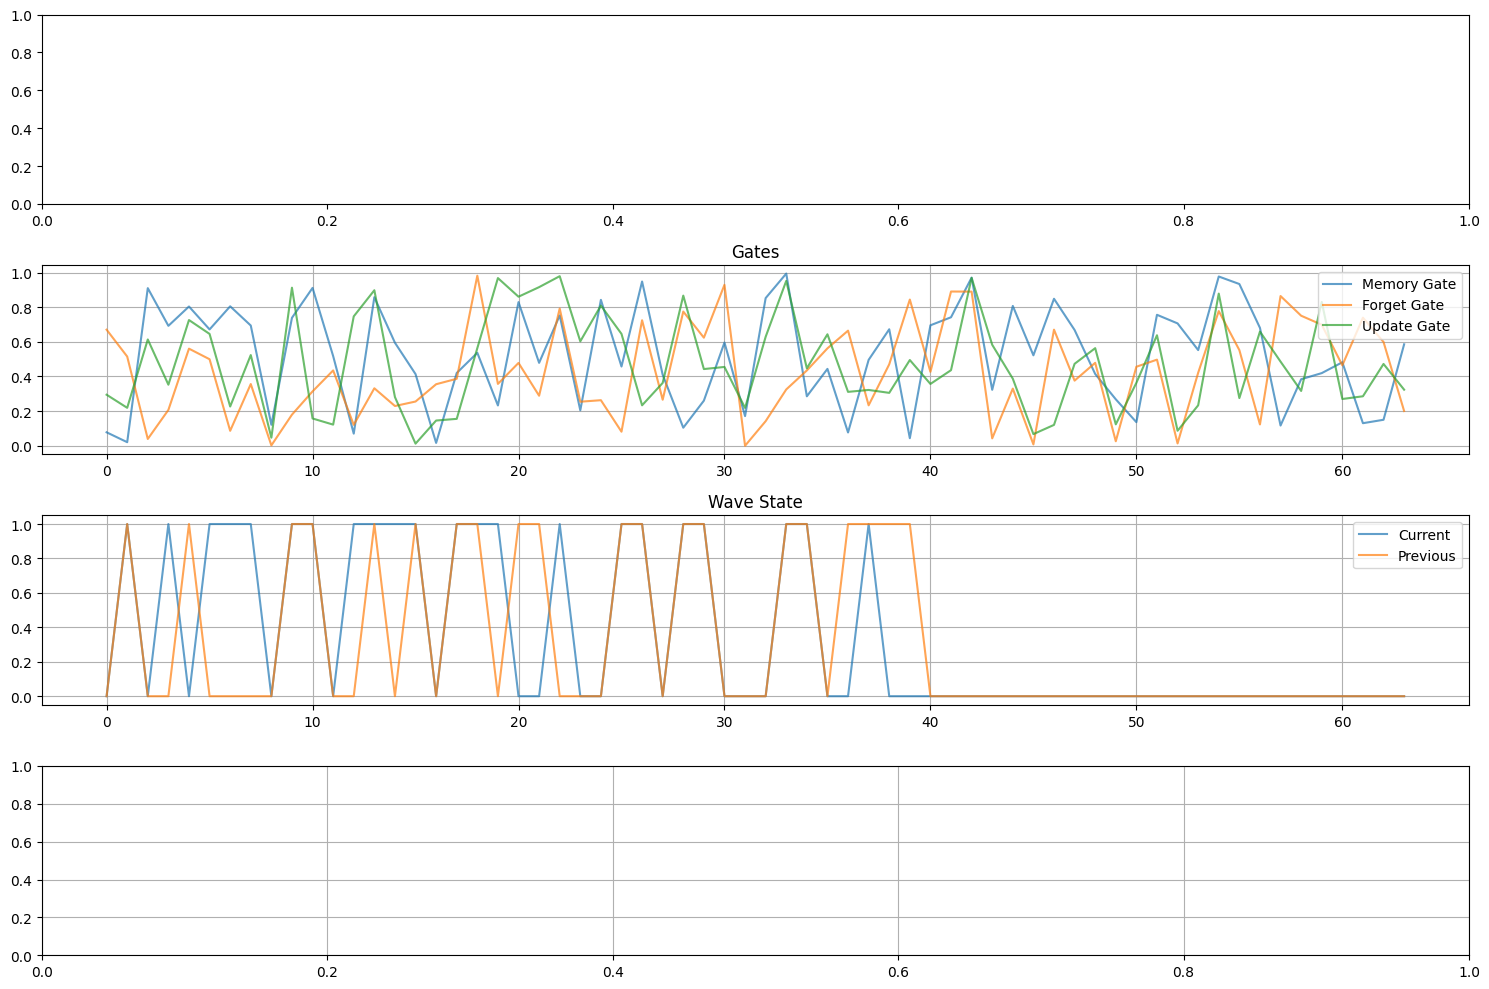


Step 3: Processing 'Hello'


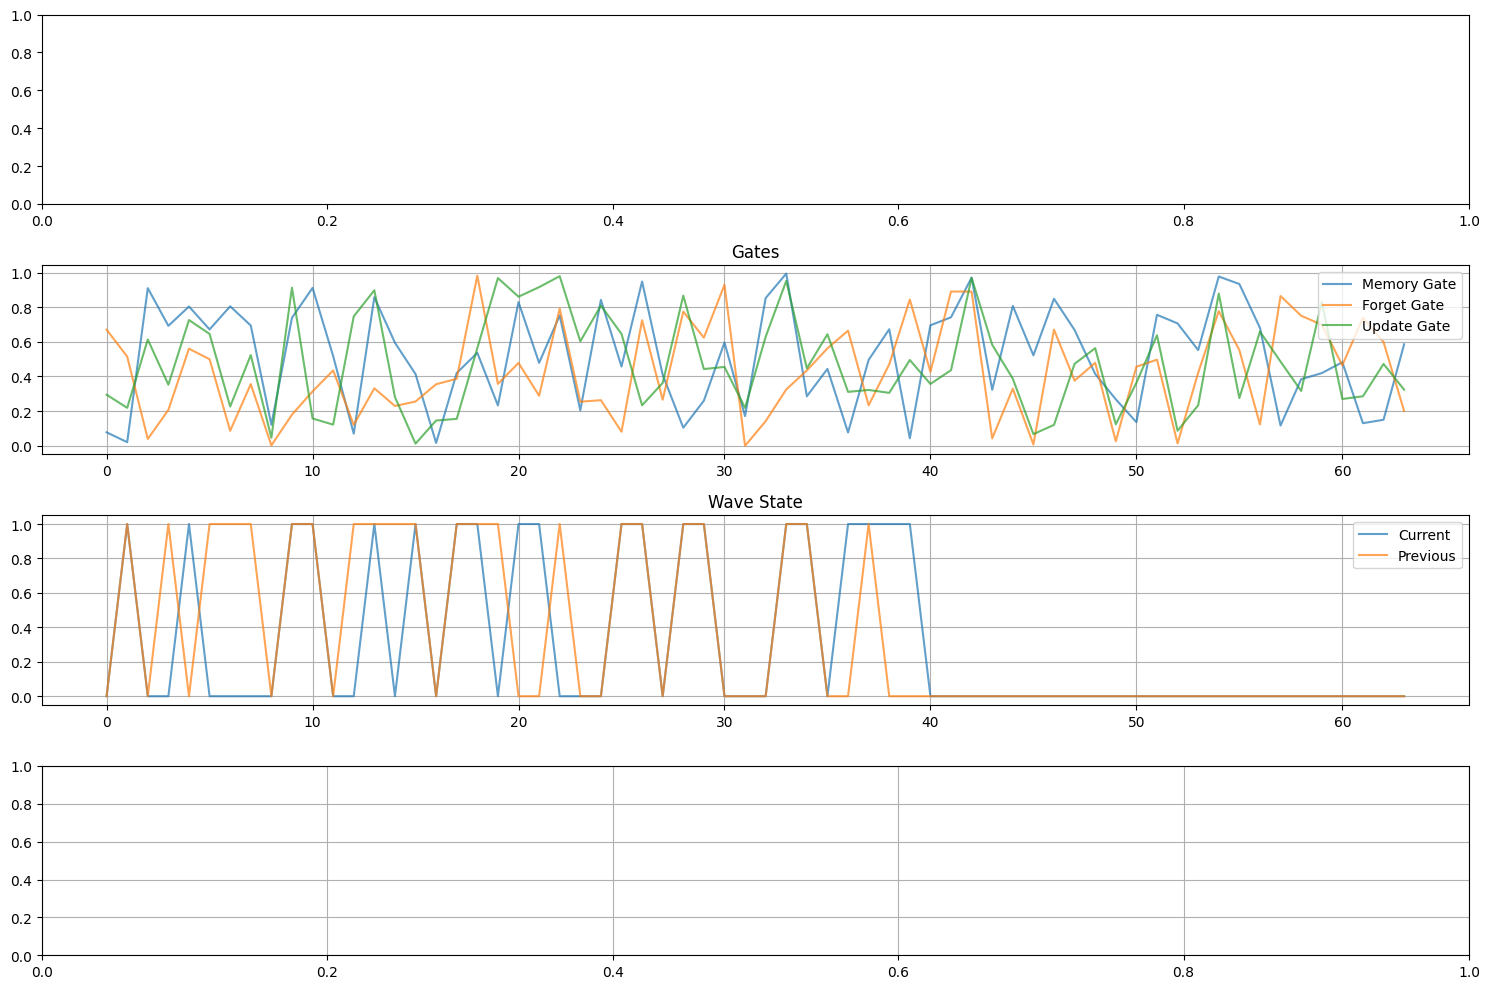


Step 4: Processing 'Python'


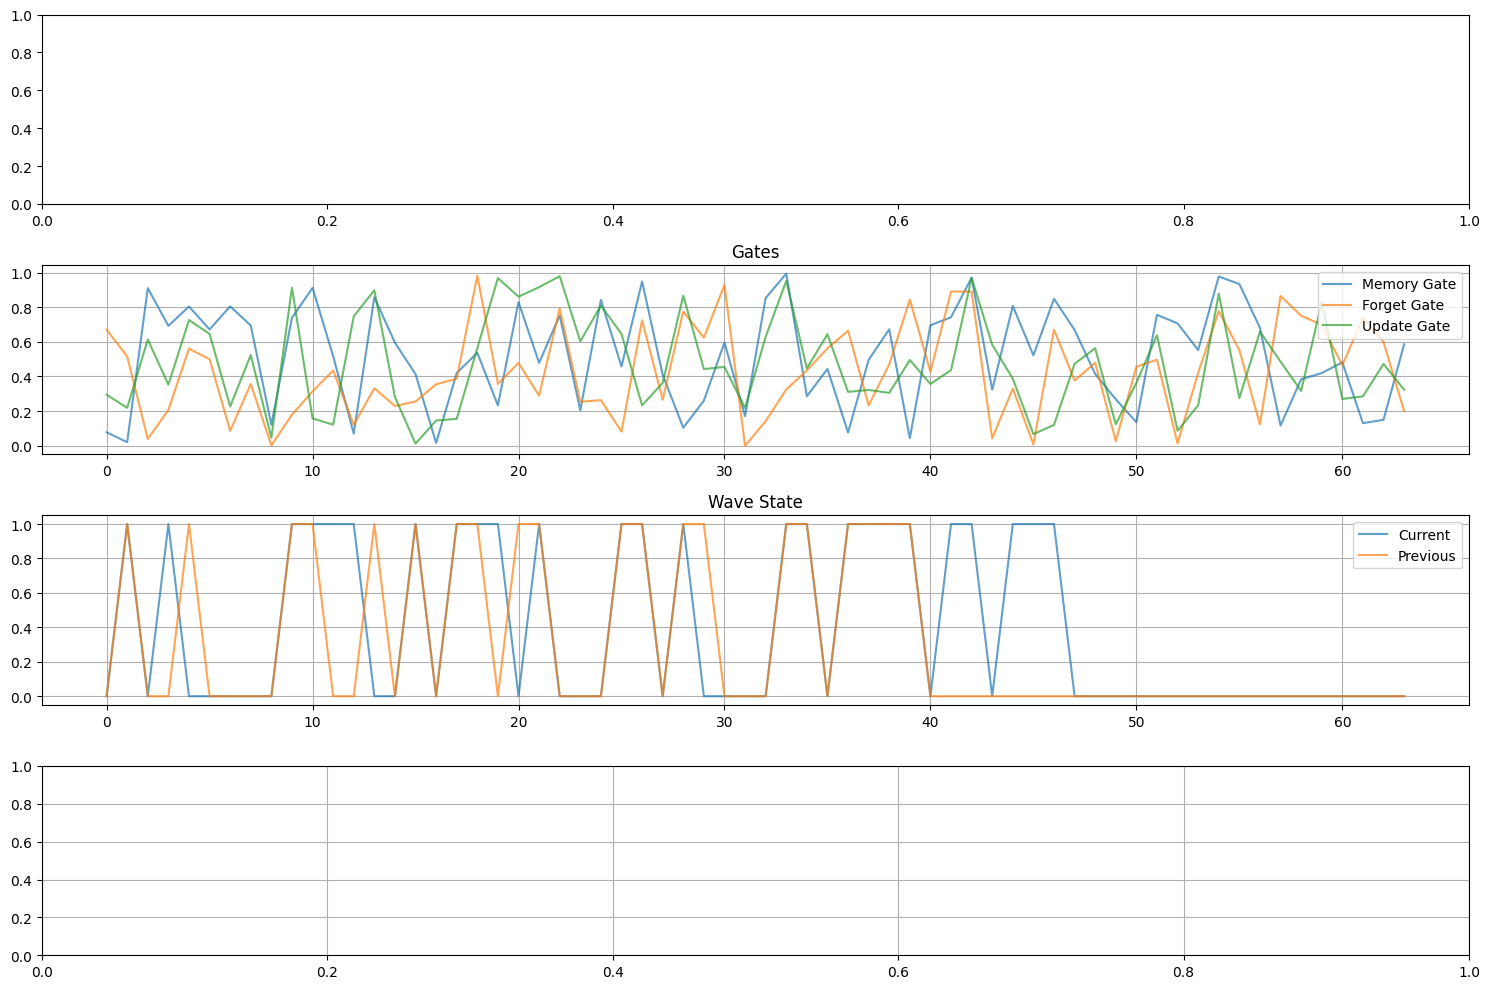

In [8]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class MemoryCell:
    address: int
    content: np.ndarray
    activation: float
    decay_rate: float

class WaveLTCNeuron:
    def __init__(self, wave_length=64, memory_size=256):
        self.wave_length = wave_length
        self.memory_size = memory_size
        
        # Memory components
        self.memory = {}  # address -> MemoryCell
        self.address_pointer = 0
        
        # Gates (as wave patterns)
        self.memory_gate = np.random.random(wave_length)
        self.forget_gate = np.random.random(wave_length)
        self.update_gate = np.random.random(wave_length)
        
        # Current wave state
        self.current_wave = np.zeros(wave_length)
        self.previous_wave = np.zeros(wave_length)
        
        # Learning parameters
        self.learning_rate = 0.1
        self.decay_base = 0.95

    def normalize_pattern(self, pattern):
        """Ensure pattern matches wave_length by padding or truncating"""
        if len(pattern) > self.wave_length:
            return pattern[:self.wave_length]
        elif len(pattern) < self.wave_length:
            return np.pad(pattern, (0, self.wave_length - len(pattern)))
        return pattern

    def wave_interference(self, wave1, wave2, mode='XOR'):
        """Apply wave interference between patterns"""
        # Ensure waves are the right length
        wave1 = self.normalize_pattern(wave1)
        wave2 = self.normalize_pattern(wave2)
        
        if mode == 'XOR':
            return np.bitwise_xor(wave1 > 0.5, wave2 > 0.5).astype(float)
        elif mode == 'AND':
            return np.bitwise_and(wave1 > 0.5, wave2 > 0.5).astype(float)
        return np.bitwise_or(wave1 > 0.5, wave2 > 0.5).astype(float)

    def apply_memory_gate(self, pattern):
        """Decide if pattern should be stored"""
        pattern = self.normalize_pattern(pattern)
        gate_activation = self.wave_interference(pattern, self.memory_gate, 'AND')
        return np.mean(gate_activation) > 0.5

    def apply_forget_gate(self, address):
        """Decide if memory should be forgotten"""
        if address in self.memory:
            cell = self.memory[address]
            forget_activation = self.wave_interference(cell.content, self.forget_gate)
            return np.mean(forget_activation) > cell.decay_rate
        return False

    def apply_update_gate(self, old_pattern, new_pattern):
        """Merge old and new patterns based on update gate"""
        old_pattern = self.normalize_pattern(old_pattern)
        new_pattern = self.normalize_pattern(new_pattern)
        gate_influence = self.wave_interference(self.update_gate, new_pattern)
        return self.wave_interference(old_pattern, gate_influence)

    def store_pattern(self, pattern):
        """Store pattern in memory with addressing"""
        pattern = self.normalize_pattern(pattern)
        if self.apply_memory_gate(pattern):
            # Create new memory cell
            decay_rate = np.mean(self.forget_gate) * self.decay_base
            cell = MemoryCell(
                address=self.address_pointer,
                content=pattern,
                activation=1.0,
                decay_rate=decay_rate
            )
            
            # Store and update pointer
            self.memory[self.address_pointer] = cell
            self.address_pointer = (self.address_pointer + 1) % self.memory_size
            
            return cell.address
        return None

    def recall_pattern(self, address):
        """Recall pattern from memory with decay"""
        if address in self.memory:
            cell = self.memory[address]
            
            # Apply decay
            cell.activation *= cell.decay_rate
            
            # Forget if activation too low
            if cell.activation < 0.1 or self.apply_forget_gate(address):
                del self.memory[address]
                return None
            
            return cell.content
        return None

    def binary_to_wave(self, pattern):
        """Convert binary string/array to wave pattern"""
        if isinstance(pattern, str):
            # Convert string to binary
            binary = ''.join(format(ord(c), '08b') for c in pattern)
            pattern = np.array([int(b) for b in binary])
        return self.normalize_pattern(pattern)

    def process_sequence(self, sequence):
        """Process a sequence of patterns with memory"""
        results = []
        addresses = []
        
        for pattern in sequence:
            # Convert to wave pattern
            wave_pattern = self.binary_to_wave(pattern)
            
            # Store pattern
            addr = self.store_pattern(wave_pattern)
            if addr is not None:
                addresses.append(addr)
            
            # Update current wave
            self.previous_wave = self.current_wave
            self.current_wave = wave_pattern
            
            # Create result from interference between current and memory
            result = self.current_wave
            for stored_addr in addresses[-3:]:  # Look at recent patterns
                stored = self.recall_pattern(stored_addr)
                if stored is not None:
                    result = self.apply_update_gate(result, stored)
            
            results.append(result)
        
        return results

    def visualize_memory(self):
        """Visualize memory state"""
        plt.figure(figsize=(15, 10))
        
        # Plot memory cells
        plt.subplot(411)
        memory_data = []
        addresses = sorted(self.memory.keys())
        for addr in addresses:
            memory_data.append(self.memory[addr].content)
        if memory_data:
            plt.imshow(memory_data, aspect='auto', cmap='binary')
            plt.title('Memory Contents')
            plt.ylabel('Address')
        
        # Plot gates
        plt.subplot(412)
        plt.plot(self.memory_gate, label='Memory Gate', alpha=0.7)
        plt.plot(self.forget_gate, label='Forget Gate', alpha=0.7)
        plt.plot(self.update_gate, label='Update Gate', alpha=0.7)
        plt.legend()
        plt.title('Gates')
        plt.grid(True)
        
        # Plot current wave
        plt.subplot(413)
        plt.plot(self.current_wave, label='Current', alpha=0.7)
        plt.plot(self.previous_wave, label='Previous', alpha=0.7)
        plt.legend()
        plt.title('Wave State')
        plt.grid(True)
        
        # Plot memory activation levels
        plt.subplot(414)
        activations = [cell.activation for cell in self.memory.values()]
        if activations:
            plt.bar(range(len(activations)), activations, alpha=0.7)
            plt.title('Memory Activations')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Example usage and demo
def demo_sequence_learning():
    # Create neuron with fixed wave length
    neuron = WaveLTCNeuron(wave_length=64, memory_size=32)
    
    # Test sequence
    sequence = [
        "Hello",
        "World",
        "Hello",  # Repetition to test memory
        "Python"
    ]
    
    print("Processing sequence:", sequence)
    print("\nWatching our little neuron learn...")
    
    # Process sequence with visualization
    for i, pattern in enumerate(sequence):
        print(f"\nStep {i+1}: Processing '{pattern}'")
        neuron.process_sequence([pattern])
        neuron.visualize_memory()
        plt.pause(1)  # Give us time to watch
    
    return neuron

# Run demo
if __name__ == "__main__":
    neuron = demo_sequence_learning()


Processing: Hello

Processing: hello
Similarities with stored patterns:
Pattern 0: 0.990

Visualizing comparison with first pattern:


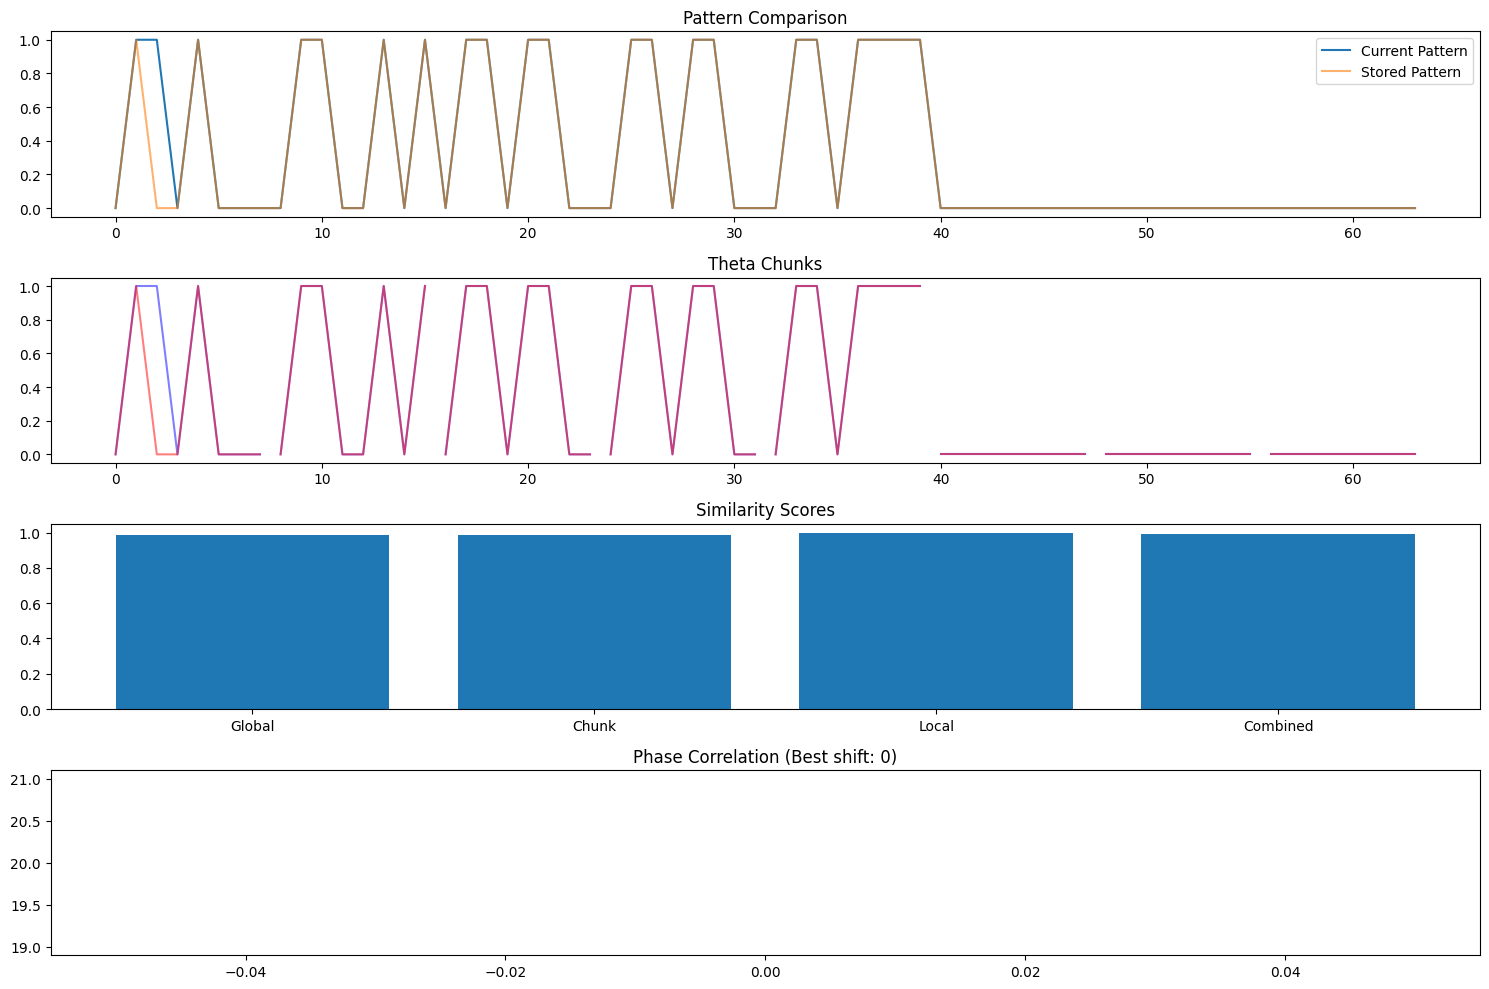


Processing: World
Similarities with stored patterns:
Pattern 0: 0.870
Pattern 1: 0.865

Visualizing comparison with first pattern:


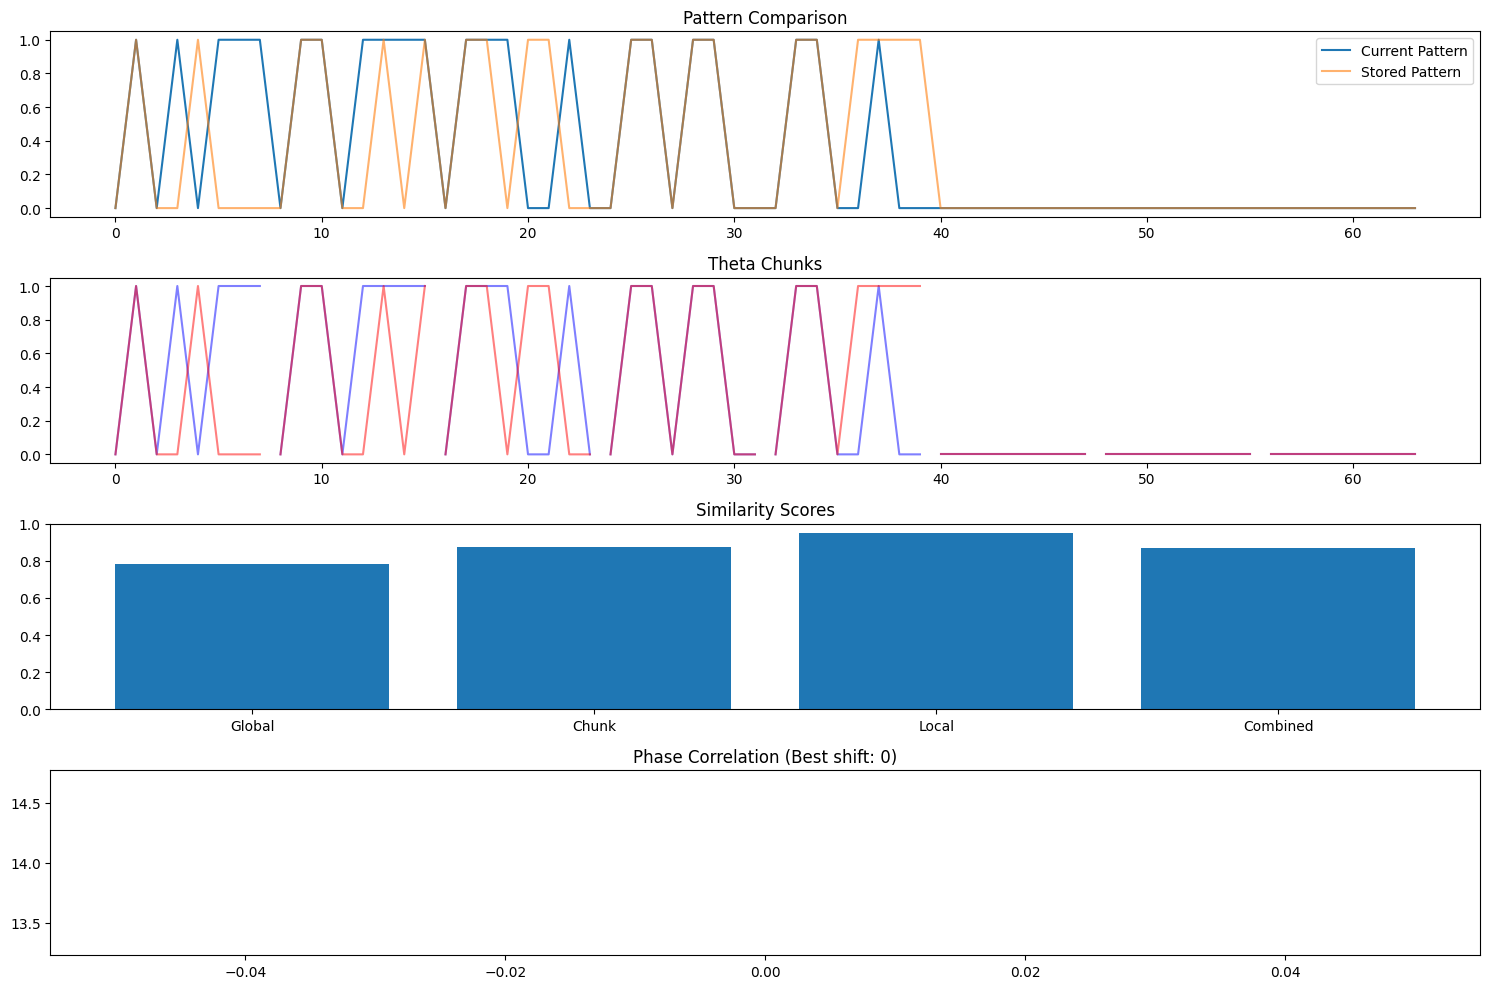


Processing: Help
Similarities with stored patterns:
Pattern 0: 0.932
Pattern 1: 0.922
Pattern 2: 0.885

Visualizing comparison with first pattern:


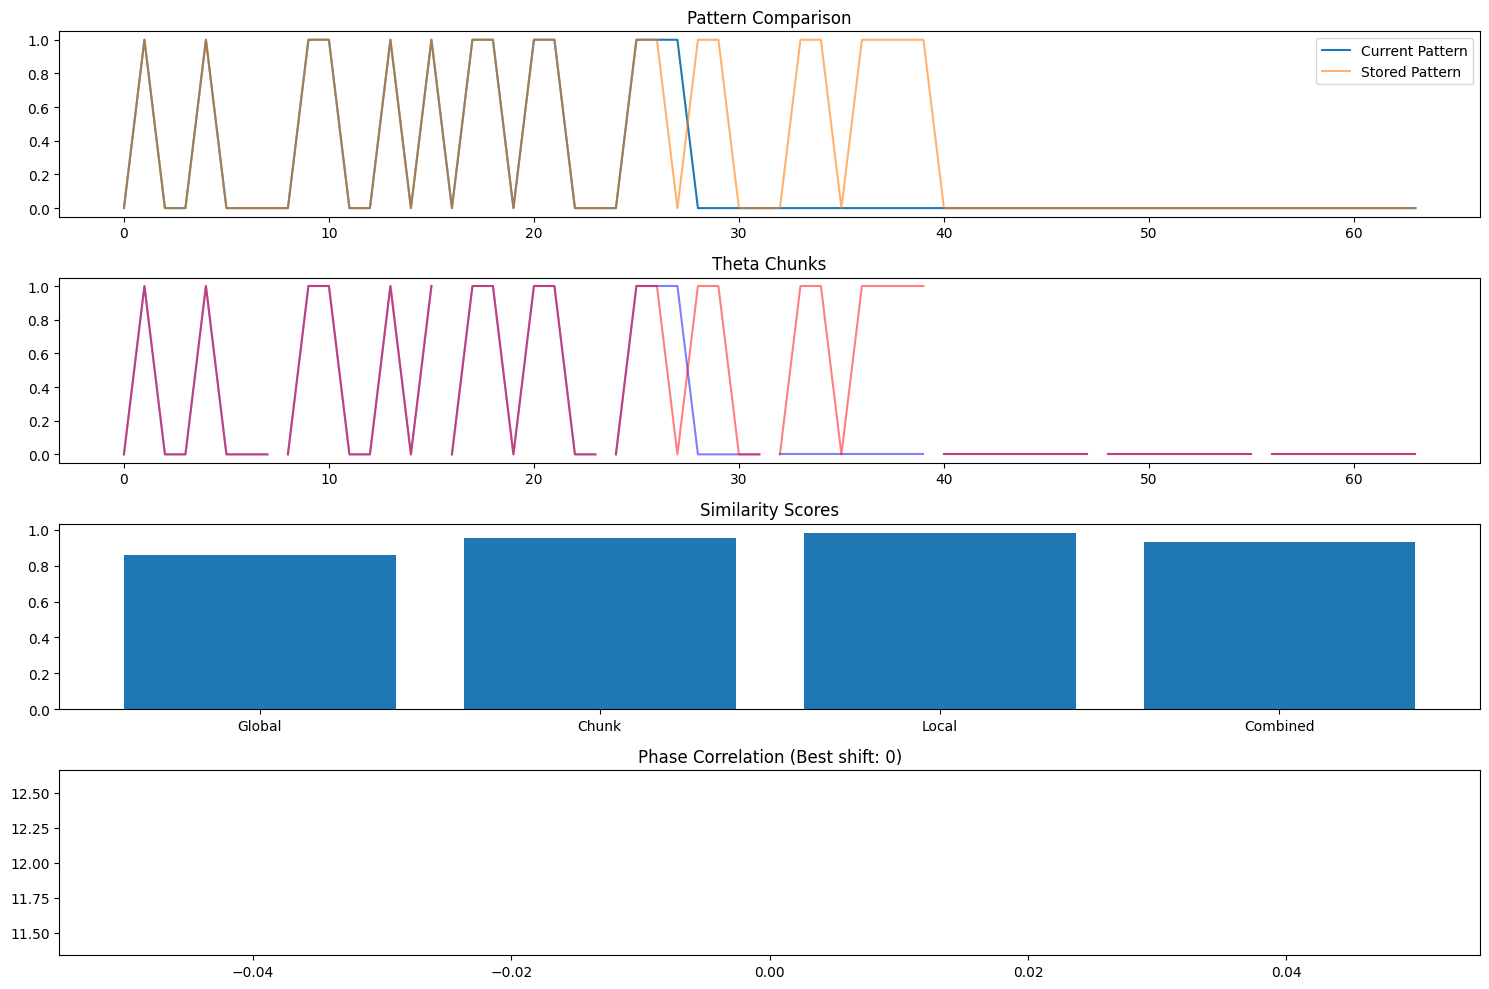

In [9]:
import numpy as np
from scipy.signal import correlate
import matplotlib.pyplot as plt

class WavePatternMatcher:
    def __init__(self, window_size=8):
        self.window_size = window_size
        
    def theta_chunk(self, wave):
        """Split wave into theta-like chunks"""
        return np.array([wave[i:i+self.window_size] 
                        for i in range(0, len(wave), self.window_size)])
        
    def phase_similarity(self, wave1, wave2, max_shift=None):
        """Calculate similarity allowing for phase shifts"""
        if max_shift is None:
            max_shift = len(wave1) // 4
            
        # Cross-correlation to find best alignment
        correlation = correlate(wave1, wave2, mode='valid')
        best_shift = np.argmax(np.abs(correlation))
        
        # Calculate similarity at best phase
        shifted = np.roll(wave2, best_shift)
        return {
            'similarity': np.mean(1 - np.abs(wave1 - shifted)),
            'shift': best_shift,
            'correlation': correlation[best_shift]
        }
    
    def chunk_similarity(self, wave1, wave2):
        """Compare waves chunk by chunk like theta waves"""
        chunks1 = self.theta_chunk(wave1)
        chunks2 = self.theta_chunk(wave2)
        
        similarities = []
        for c1 in chunks1:
            # Find best matching chunk
            chunk_scores = [self.phase_similarity(c1, c2)['similarity'] 
                          for c2 in chunks2]
            similarities.append(max(chunk_scores))
            
        return np.mean(similarities)
    
    def fuzzy_match(self, wave1, wave2):
        """Multi-level similarity detection"""
        # Global pattern similarity
        global_sim = self.phase_similarity(wave1, wave2)
        
        # Chunk-level similarity
        chunk_sim = self.chunk_similarity(wave1, wave2)
        
        # Local feature similarity (using smaller windows)
        local_matcher = WavePatternMatcher(window_size=4)
        local_sim = local_matcher.chunk_similarity(wave1, wave2)
        
        return {
            'global': global_sim['similarity'],
            'chunk': chunk_sim,
            'local': local_sim,
            'combined': (global_sim['similarity'] + chunk_sim + local_sim) / 3
        }

class EnhancedWaveLTCNeuron(WaveLTCNeuron):
    def __init__(self, wave_length=64, memory_size=256):
        super().__init__(wave_length, memory_size)
        self.pattern_matcher = WavePatternMatcher()
        self.pattern_memory = []
        
    def store_with_similarity(self, pattern):
        """Store pattern and compute similarities with memory"""
        similarities = []
        for stored_pattern in self.pattern_memory:
            sim = self.pattern_matcher.fuzzy_match(pattern, stored_pattern)
            similarities.append(sim)
            
        # Store new pattern
        self.pattern_memory.append(pattern)
        
        return similarities
    
    def visualize_similarity(self, pattern, memory_index):
        """Visualize similarity between pattern and stored memory"""
        if memory_index < len(self.pattern_memory):
            stored = self.pattern_memory[memory_index]
            sim = self.pattern_matcher.fuzzy_match(pattern, stored)
            
            plt.figure(figsize=(15, 10))
            
            # Plot patterns
            plt.subplot(411)
            plt.plot(pattern, label='Current Pattern')
            plt.plot(stored, label='Stored Pattern', alpha=0.6)
            plt.legend()
            plt.title('Pattern Comparison')
            
            # Plot chunks
            chunks1 = self.pattern_matcher.theta_chunk(pattern)
            chunks2 = self.pattern_matcher.theta_chunk(stored)
            
            plt.subplot(412)
            for i, chunk in enumerate(chunks1):
                plt.plot(np.arange(i*8, (i+1)*8), chunk, 'b-', alpha=0.5)
            for i, chunk in enumerate(chunks2):
                plt.plot(np.arange(i*8, (i+1)*8), chunk, 'r-', alpha=0.5)
            plt.title('Theta Chunks')
            
            # Plot similarity scores
            plt.subplot(413)
            scores = list(sim.values())
            plt.bar(['Global', 'Chunk', 'Local', 'Combined'], scores)
            plt.title('Similarity Scores')
            
            # Phase correlation
            plt.subplot(414)
            phase = self.pattern_matcher.phase_similarity(pattern, stored)
            plt.plot(phase['correlation'])
            plt.title(f'Phase Correlation (Best shift: {phase["shift"]})')
            
            plt.tight_layout()
            plt.show()

# Example usage
def demo_similarity():
    neuron = EnhancedWaveLTCNeuron()
    
    # Test patterns
    patterns = [
        "Hello",  # Original
        "hello",  # Similar
        "World",  # Different
        "Help",   # Partially similar
    ]
    
    # Process and compare patterns
    for i, pattern in enumerate(patterns):
        print(f"\nProcessing: {pattern}")
        wave = neuron.binary_to_wave(pattern)
        similarities = neuron.store_with_similarity(wave)
        
        if similarities:
            print("Similarities with stored patterns:")
            for j, sim in enumerate(similarities):
                print(f"Pattern {j}: {sim['combined']:.3f}")
                
        if i > 0:
            print("\nVisualizing comparison with first pattern:")
            neuron.visualize_similarity(wave, 0)
            plt.pause(1)
    
    return neuron

# Run demo
if __name__ == "__main__":
    neuron = demo_similarity()

In [12]:
import numpy as np
from dataclasses import dataclass
import  matplotlib.pyplot as plt

@dataclass
class MemoryCell:
    address: int
    content: np.ndarray
    activation: float
    decay_rate: float
    strength: float = 1.0
    coactivations: dict = None

    def __post_init__(self):
        if self.coactivations is None:
            self.coactivations = {}

class WaveLTCNeuron:
    def __init__(self, wave_length=64, memory_size=256):
        self.wave_length = wave_length
        self.memory_size = memory_size
        self.memory = {}
        self.address_pointer = 0
        
        self.memory_gate = np.random.random(wave_length)
        self.forget_gate = np.random.random(wave_length)
        self.update_gate = np.random.random(wave_length)
        
        self.gate_strengths = {
            'memory': np.ones(wave_length),
            'forget': np.ones(wave_length),
            'update': np.ones(wave_length)
        }
        
        self.current_wave = np.zeros(wave_length)
        self.previous_wave = np.zeros(wave_length)
        self.learning_rate = 0.1
        self.decay_base = 0.95

    def binary_to_wave(self, pattern):
        """Convert string or binary pattern to wave"""
        if isinstance(pattern, str):
            # Convert string to binary representation
            binary = ''.join(format(ord(c), '08b') for c in pattern)
            pattern = np.array([int(b) for b in binary])
        return self.normalize_pattern(pattern)

    def normalize_pattern(self, pattern):
        """Ensure pattern matches wave_length"""
        if len(pattern) > self.wave_length:
            return pattern[:self.wave_length]
        elif len(pattern) < self.wave_length:
            return np.pad(pattern, (0, self.wave_length - len(pattern)))
        return pattern

    def strengthen_connections(self, pattern1, pattern2, gate_type='memory'):
        """Hebbian connection strengthening"""
        alignment = np.logical_and(pattern1 > 0.5, pattern2 > 0.5)
        self.gate_strengths[gate_type][alignment] += self.learning_rate
        non_alignment = ~alignment
        self.gate_strengths[gate_type][non_alignment] *= self.decay_base

    def weighted_interference(self, wave1, wave2, gate_type='memory', mode='AND'):
        """Wave interference with Hebbian weights"""
        strengths = self.gate_strengths[gate_type]
        wave1 = self.normalize_pattern(wave1)
        wave2 = self.normalize_pattern(wave2)
        
        weighted1 = wave1 * strengths
        weighted2 = wave2 * strengths
        
        bin1 = weighted1 > 0.5
        bin2 = weighted2 > 0.5
        
        if mode == 'XOR':
            result = np.logical_xor(bin1, bin2)
        elif mode == 'AND':
            result = np.logical_and(bin1, bin2)
        else:
            result = np.logical_or(bin1, bin2)
            
        return result.astype(float)

    def apply_memory_gate(self, pattern):
        """Apply memory gate with Hebbian learning"""
        result = self.weighted_interference(pattern, self.memory_gate, 'memory', 'AND')
        if np.mean(result) > 0.5:
            self.strengthen_connections(pattern, self.memory_gate, 'memory')
        return np.mean(result) > 0.5

    def apply_forget_gate(self, address):
        """Apply forget gate with decay"""
        if address in self.memory:
            cell = self.memory[address]
            forget_activation = self.weighted_interference(
                cell.content, self.forget_gate, 'forget', 'AND')
            return np.mean(forget_activation) > cell.decay_rate
        return False

    def store_pattern(self, pattern):
        """Store pattern with Hebbian properties"""
        pattern = self.normalize_pattern(pattern)
        if self.apply_memory_gate(pattern):
            cell = MemoryCell(
                address=self.address_pointer,
                content=pattern,
                activation=1.0,
                decay_rate=self.decay_base,
                strength=1.0
            )
            
            # Check for co-activations
            for addr, existing_cell in self.memory.items():
                similarity = self.weighted_interference(
                    pattern, existing_cell.content, 'memory')
                if np.mean(similarity) > 0.5:
                    cell.coactivations[addr] = 1.0
                    existing_cell.coactivations[self.address_pointer] = 1.0
            
            self.memory[self.address_pointer] = cell
            addr = self.address_pointer
            self.address_pointer = (self.address_pointer + 1) % self.memory_size
            return addr
        return None

    def recall_pattern(self, address):
        """Recall pattern with decay"""
        if address in self.memory:
            cell = self.memory[address]
            cell.activation *= cell.decay_rate
            
            if cell.activation < 0.1 or self.apply_forget_gate(address):
                del self.memory[address]
                return None
                
            return cell.content
        return None

    def visualize_memory(self):
        """Visualize neuron state"""
        plt.figure(figsize=(15, 12))
        
        # Memory contents
        plt.subplot(511)
        memory_data = []
        addresses = sorted(self.memory.keys())
        for addr in addresses:
            memory_data.append(self.memory[addr].content)
        if memory_data:
            plt.imshow(memory_data, aspect='auto', cmap='binary')
            plt.title('Memory Contents')
            plt.ylabel('Address')
        
        # Gates
        plt.subplot(512)
        plt.plot(self.memory_gate, label='Memory Gate', alpha=0.7)
        plt.plot(self.forget_gate, label='Forget Gate', alpha=0.7)
        plt.plot(self.update_gate, label='Update Gate', alpha=0.7)
        plt.legend()
        plt.title('Gate Patterns')
        plt.grid(True)
        
        # Gate strengths
        plt.subplot(513)
        for gate_type, strengths in self.gate_strengths.items():
            plt.plot(strengths, label=f'{gate_type} strengths', alpha=0.7)
        plt.legend()
        plt.title('Hebbian Gate Strengths')
        plt.grid(True)
        
        # Wave state
        plt.subplot(514)
        plt.plot(self.current_wave, label='Current', alpha=0.7)
        plt.plot(self.previous_wave, label='Previous', alpha=0.7)
        plt.legend()
        plt.title('Wave State')
        plt.grid(True)
        
        # Co-activations
        plt.subplot(515)
        coactivation_matrix = np.zeros((len(self.memory), len(self.memory)))
        for i, cell in self.memory.items():
            for j, strength in cell.coactivations.items():
                coactivation_matrix[i, j] = strength
        plt.imshow(coactivation_matrix, cmap='viridis')
        plt.title('Memory Co-activations')
        plt.colorbar()
        
        plt.tight_layout()
        plt.show()

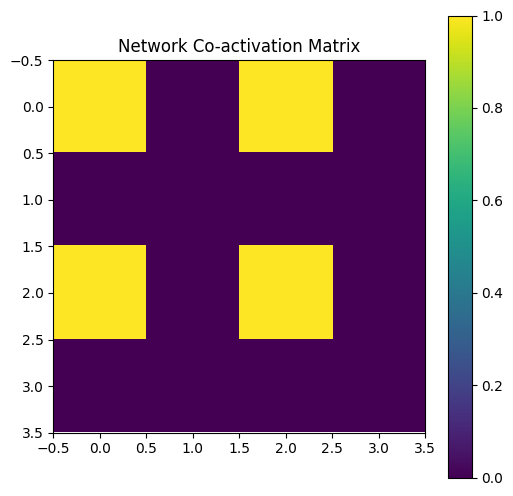

Time 0, fade 1.0 -> [1. 0. 1. 0.]
Time 1, fade 0.9 -> [1. 0. 1. 0.]
Time 2, fade 0.8 -> [1. 0. 1. 0.]
Time 3, fade 0.7 -> [1. 0. 1. 0.]
Time 4, fade 0.6 -> [1. 0. 1. 0.]
Time 5, fade 0.5 -> [1. 0. 1. 0.]
Time 6, fade 0.4 -> [1. 0. 1. 0.]
Time 7, fade 0.3 -> [1. 0. 1. 0.]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

class BinaryNeuralNetwork:
    def __init__(self, size=4):
        self.size = size
        self.state = np.zeros(size)
        self.connections = np.eye(size)  # Initially diagonal matrix
        self.decay_rate = 0.1
        self.threshold = 0.5
        
    def activate(self, input_pattern):
        """Activate network with input pattern"""
        self.state = np.where(input_pattern > self.threshold, 1.0, 0.0)
        
    def update(self):
        """Update network state with temporal decay"""
        self.state *= (1.0 - self.decay_rate)
        self.state = np.where(self.state > self.threshold, 1.0, 0.0)
        
    def get_coactivation_matrix(self):
        """Calculate co-activation matrix"""
        return np.outer(self.state, self.state)

def visualize_network(network, time_steps=8):
    """Visualize network state over time"""
    plt.figure(figsize=(6, 6))
    
    # Create co-activation matrix
    coactivation_matrix = network.get_coactivation_matrix()
    
    # Plot matrix
    plt.imshow(coactivation_matrix, cmap='viridis')
    plt.colorbar()
    plt.title(f'Network Co-activation Matrix')
    plt.show()
    
    # Show temporal evolution
    for t in range(time_steps):
        fade = 1.0 - (t * network.decay_rate)
        print(f"Time {t}, fade {fade:.1f} -> {network.state}")
        network.update()

# Example usage:
network = BinaryNeuralNetwork(size=4)
network.activate(np.array([1, 0, 1, 0]))
visualize_network(network)